# PCA 
1. PCA is a method for dimensionality reduction. It is a form of unsupervised technique, that is used as pre-processing step  when the dimension(features vectors) are big. 
<br>
2. Data with higher dimensions has often the problem of overfitting. Therefore, the model won't be able to produce generalize form except in training set.
<br>
3. The calculated PCA are the vectors, where the frist PCA vectors has highest amount of variance and is orthognal to the second one. The  dimension of PCA vectors is equal to the dimension of the features vector in the data. 

\begin{equation}
\text{Variation or spreading of the data}:  variance = \frac{1}{N} \sum(X_i - X_{mean})^{2} 
\end{equation}

\begin{equation}
\text{Specifies the extent to which the variables differ eachother }:cov(X,X) = \frac{1}{N} \sum(X_i - X_{mean})(X_i - X_{mean})^{T} 
\end{equation}

\begin{equation}
cov(X,Y) = \frac{1}{N} \sum(X_i - X_{mean})(Y_i - Y_{mean})^{T} 
\end{equation}

4. Workflow of PCA
   - Normalize data
   - Compute covarince matrix
   - Select the PCA numbers
   - compute new PCA vectors
   
   

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
def pca_from_scratch(x, n_pca):
    
    #x = x - np.mean(x,axis =0)
    #x = (x - np.mean(x,axis =0))/np.std(x, axis =0)
    #acquired highest accuracy when dividing the data with standard deviation ---> Standardization
    #This steps is applied if the data is not normalized or standarized

    # covarince matrix
    cov_matrix = np.cov(x.T)

    #Eigen values, Eigenvectors
    eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
    # one column vector is one eigen vector v[:,i]
    eig_vecs = eig_vecs.T

    #sort the index of eigen values in descending order
    idx = np.argsort(eig_vals)[::-1]
    eig_vals = eig_vals[idx]
    eig_vecs = eig_vecs[idx]



    #PCA Dimension
    n_pca = n_pca
    n_components = eig_vecs[0:n_pca]


    # reduced X 
    x_pca = np.dot(x, n_components.T)
    
    return x_pca 

In [3]:
# let's apply this into sklearn  datasets
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#load data
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [4]:
#The 30 features vector is now reduced into 2 features vector with PCA
x_pca = pca_from_scratch(X,2)
x_train,x_test,y_train,y_test = train_test_split(x_pca,y, test_size=0.2, random_state=42)

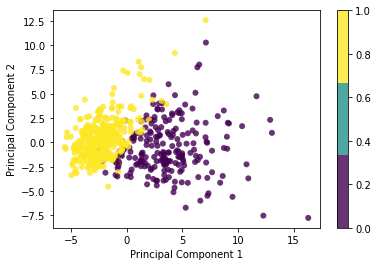

In [5]:
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()